In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [3]:
data = pd.read_csv("BankChurners.csv")

In [4]:
data.shape

(10127, 23)

In [5]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


GIGO : Garbage In Garbage Out

GENERAL CLEANING TECHNIQUES :

Checking Duplicates:

In [6]:
data['CLIENTNUM'].nunique()

10127

Deleting duplicates :

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(10127, 23)

In [9]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

deleting extra columns :

In [10]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

Checking datatypes of columns, see whether data type is okay or not. In python strings are objects

In [11]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Missing Values :

In [12]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In this dataset, there are no missing values based on the above code.
If there would have been missing values, we could have used the code given below:

In [13]:
data['Education_Level'] = data['Education_Level'].fillna("Unknown")

<ipython-input-13-9ee4c44c8a3d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



To see the rows which had missing values and now have written unknown. In the first place, the data had no missing values. So no such row:

In [14]:
data[data['Education_Level'].isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


DATA TRANSFORMATION : BINNING

To bin the ages or grouping the data on the basis of min and max ages :


In [15]:
print(data['Customer_Age'].min())
print(data['Customer_Age'].max())

26
73


In [16]:
bins=[25,30,40,50,60,70,80]
labels=['20s','30s','40s','50s','60s','70s']
data['Customer_Age_bins']=pd.cut(data['Customer_Age'],bins=bins,labels=labels,include_lowest=True,right=False)

<ipython-input-16-e1af13ee5a70>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
data[data['Customer_Age']==30]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_bins
789,754654383,Existing Customer,30,M,2,High School,Married,Less than $40K,Blue,23,4,2,0,2997.0,1393,1604.0,1.120,1577,35,0.522,0.465,30s
803,711748983,Existing Customer,30,M,1,High School,Married,$60K - $80K,Blue,17,3,3,2,7906.0,1631,6275.0,0.889,1946,45,0.552,0.206,30s
890,779149683,Existing Customer,30,F,0,Graduate,Divorced,Unknown,Blue,13,5,1,2,7772.0,1890,5882.0,0.754,2585,75,0.829,0.243,30s
939,772375533,Existing Customer,30,M,1,Graduate,Married,$80K - $120K,Blue,19,5,3,2,9959.0,2377,7582.0,1.100,1560,39,0.696,0.239,30s
974,714131058,Existing Customer,30,M,0,Graduate,Unknown,$60K - $80K,Blue,36,3,5,3,18513.0,2517,15996.0,0.524,1567,33,0.941,0.136,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,715923408,Existing Customer,30,F,0,College,Married,Less than $40K,Blue,19,4,2,3,4184.0,1254,2930.0,0.549,14999,110,0.719,0.300,30s
10004,764316708,Existing Customer,30,F,1,High School,Single,Less than $40K,Blue,23,3,2,2,3955.0,2352,1603.0,0.779,16423,109,0.758,0.595,30s
10021,711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575,30s
10055,710066133,Attrited Customer,30,M,0,Graduate,Single,Less than $40K,Silver,36,4,3,3,12833.0,0,12833.0,0.853,9619,75,0.786,0.000,30s


EXPLORATORY DATA ANALYSIS(EDA) :

In [18]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [19]:
data['Attrition_Flag'].value_counts()['Attrited Customer']/data.shape[0]

0.1606596227905599

In [20]:
print(round(data['Attrition_Flag'].value_counts()['Attrited Customer']/data.shape[0]*100,2),"% of our customes have churned")

16.07 % of our customes have churned


Summary Statistics  :

In [21]:
y=list(range(0,110,10))
print(y)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [22]:
mean=sum(y)/len(y)

In [23]:
np.mean(y)

50.0

In [24]:
np.median(y)

50.0

In case of outliers, median is much better to represent central tendency. Because mean can be affected hugely by outliers.

In [25]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


DISTRIBUTIONS : HISTOGRAMS

(array([2.650e+02, 6.540e+02, 1.478e+03, 1.778e+03, 2.422e+03, 1.920e+03,
        9.210e+02, 5.350e+02, 1.520e+02, 2.000e+00]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <BarContainer object of 10 artists>)

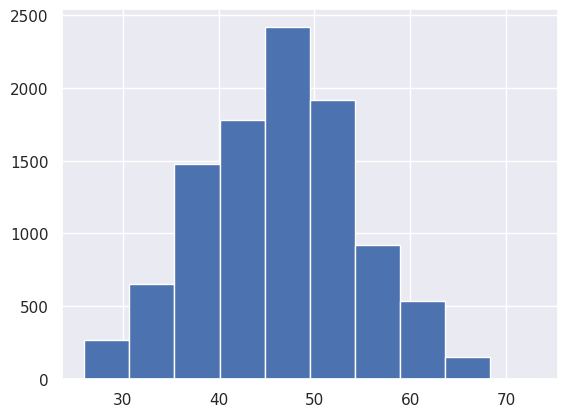

In [26]:
plt.hist(data['Customer_Age'])

(array([ 188.,  278.,  546., 1208., 1265., 3485., 1515.,  825.,  479.,
         338.]),
 array([13. , 17.3, 21.6, 25.9, 30.2, 34.5, 38.8, 43.1, 47.4, 51.7, 56. ]),
 <BarContainer object of 10 artists>)

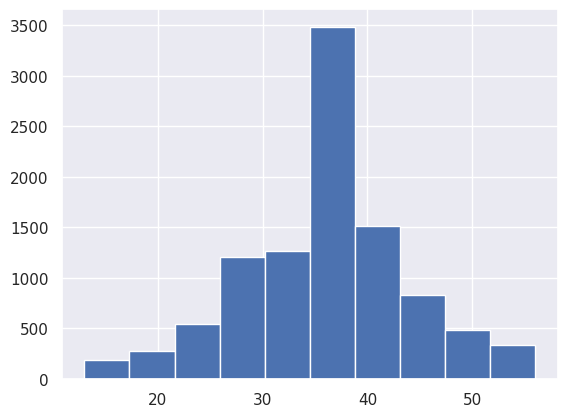

In [27]:
plt.hist(data['Months_on_book'])

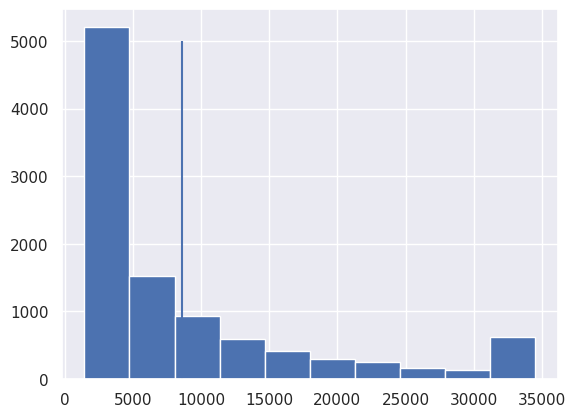

In [28]:
plt.hist(data['Credit_Limit'])
plt.vlines(data['Credit_Limit'].mean(),0,5000)
plt.vlines(data['Credit_Limit'].median(),0,5000)

In [29]:
data['Credit_Limit'].mean()

8631.953698034955

In [30]:
data['Credit_Limit'].median()

4549.0

Text(0.5, 0, 'Credit Limit')

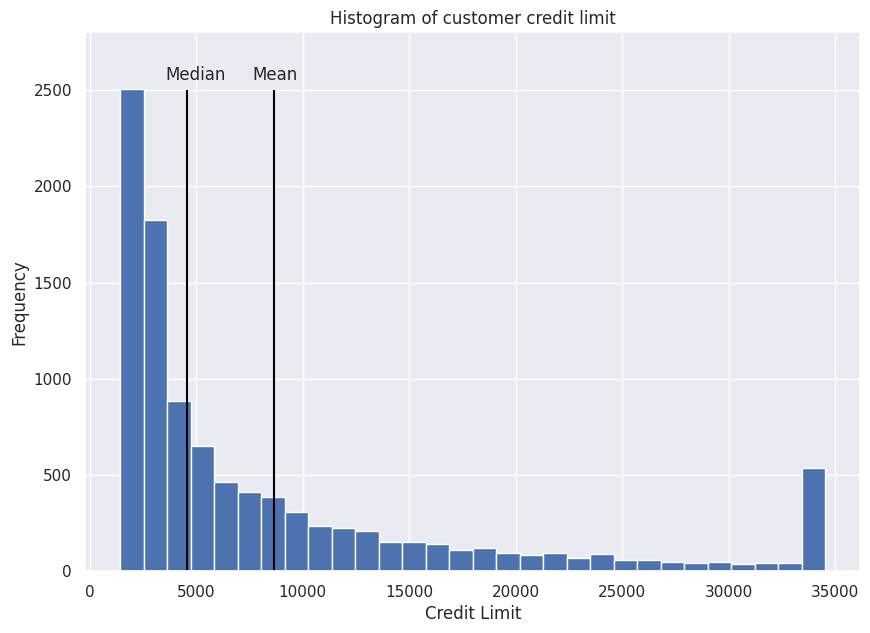

In [31]:
plt.figure(figsize=(10,7))
plt.hist(data['Credit_Limit'],bins=30)     #Default size of bin is 10
plt.vlines(data['Credit_Limit'].mean(),0,2500,colors='Black')
plt.vlines(data['Credit_Limit'].median(),0,2500,colors='Black')
plt.text(data['Credit_Limit'].mean()-1000,2500+50,"Mean")
plt.text(data['Credit_Limit'].median()-1000,2500+50,"Median")
plt.ylim(0,2800)
plt.title("Histogram of customer credit limit")
plt.ylabel("Frequency")
plt.xlabel("Credit Limit")

(array([ 187., 1074., 1658., 1246., 2267., 2289.,  757.,  331.,  275.,
          43.]),
 array([ 10. ,  22.9,  35.8,  48.7,  61.6,  74.5,  87.4, 100.3, 113.2,
        126.1, 139. ]),
 <BarContainer object of 10 artists>)

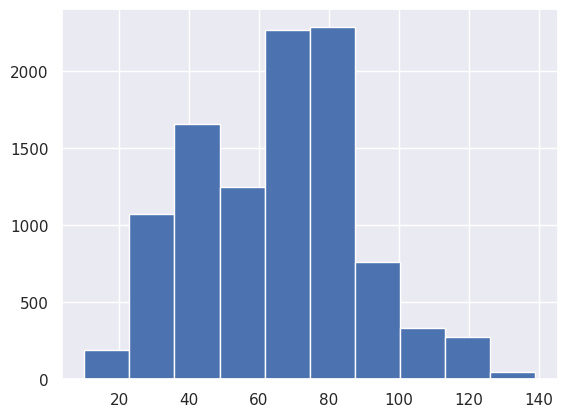

In [32]:
plt.hist(data['Total_Trans_Ct'])

(array([ 10.,  30.,  26.,  53.,  68., 141., 211., 159., 320., 243., 415.,
        262., 417., 356., 208., 301., 149., 273., 294., 229., 442., 330.,
        558., 396., 541., 598., 374., 583., 316., 418., 207., 211., 146.,
         86., 107.,  55.,  94.,  66.,  47.,  69.,  48.,  75.,  47.,  55.,
         50.,  22.,  17.,   1.,   1.,   2.]),
 array([ 10.  ,  12.58,  15.16,  17.74,  20.32,  22.9 ,  25.48,  28.06,
         30.64,  33.22,  35.8 ,  38.38,  40.96,  43.54,  46.12,  48.7 ,
         51.28,  53.86,  56.44,  59.02,  61.6 ,  64.18,  66.76,  69.34,
         71.92,  74.5 ,  77.08,  79.66,  82.24,  84.82,  87.4 ,  89.98,
         92.56,  95.14,  97.72, 100.3 , 102.88, 105.46, 108.04, 110.62,
        113.2 , 115.78, 118.36, 120.94, 123.52, 126.1 , 128.68, 131.26,
        133.84, 136.42, 139.  ]),
 <BarContainer object of 50 artists>)

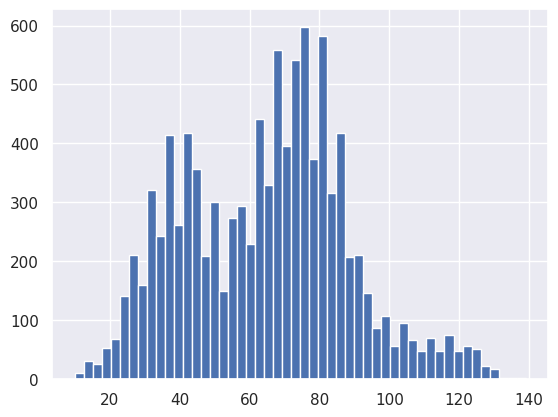

In [33]:
plt.hist(data['Total_Trans_Ct'],bins=50)

DATA TRANSFORMATION : Normalization & Log

Normalization is also referred to as min-max scaler
Log transformation : This make the data less skewed

In [34]:
def normalize(column):
  upper=column.max()
  lower=column.min()
  y=(column-lower)/(upper-lower)
  return y

In [35]:
data['Credit_Limit_Normalized']=normalize(data['Credit_Limit'])

In [36]:
data['Credit_Limit_Log_Transformed']=np.log(data['Credit_Limit'])

(array([5211., 1524.,  931.,  589.,  407.,  299.,  252.,  161.,  128.,
         625.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

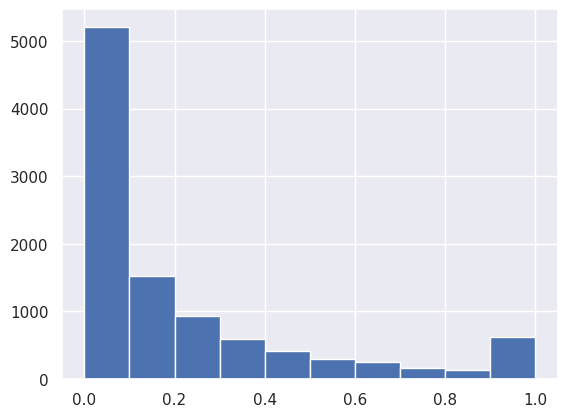

In [37]:
plt.hist(data['Credit_Limit_Normalized'])

(array([1375., 1521., 1513., 1018.,  927.,  906.,  783.,  657.,  541.,
         886.]),
 array([ 7.27121714,  7.58901325,  7.90680936,  8.22460548,  8.54240159,
         8.8601977 ,  9.17799381,  9.49578993,  9.81358604, 10.13138215,
        10.44917826]),
 <BarContainer object of 10 artists>)

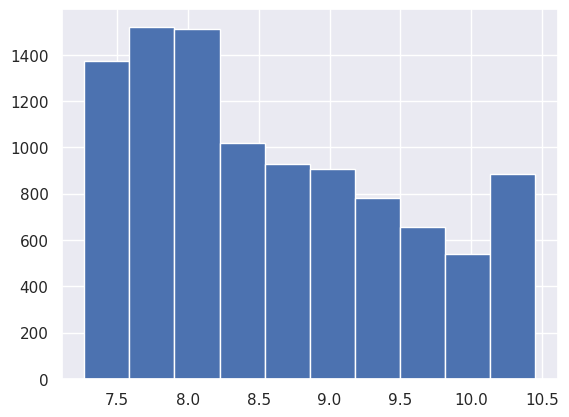

In [38]:
plt.hist(data['Credit_Limit_Log_Transformed'])

<Axes: xlabel='Credit_Limit_Log_Transformed', ylabel='Count'>

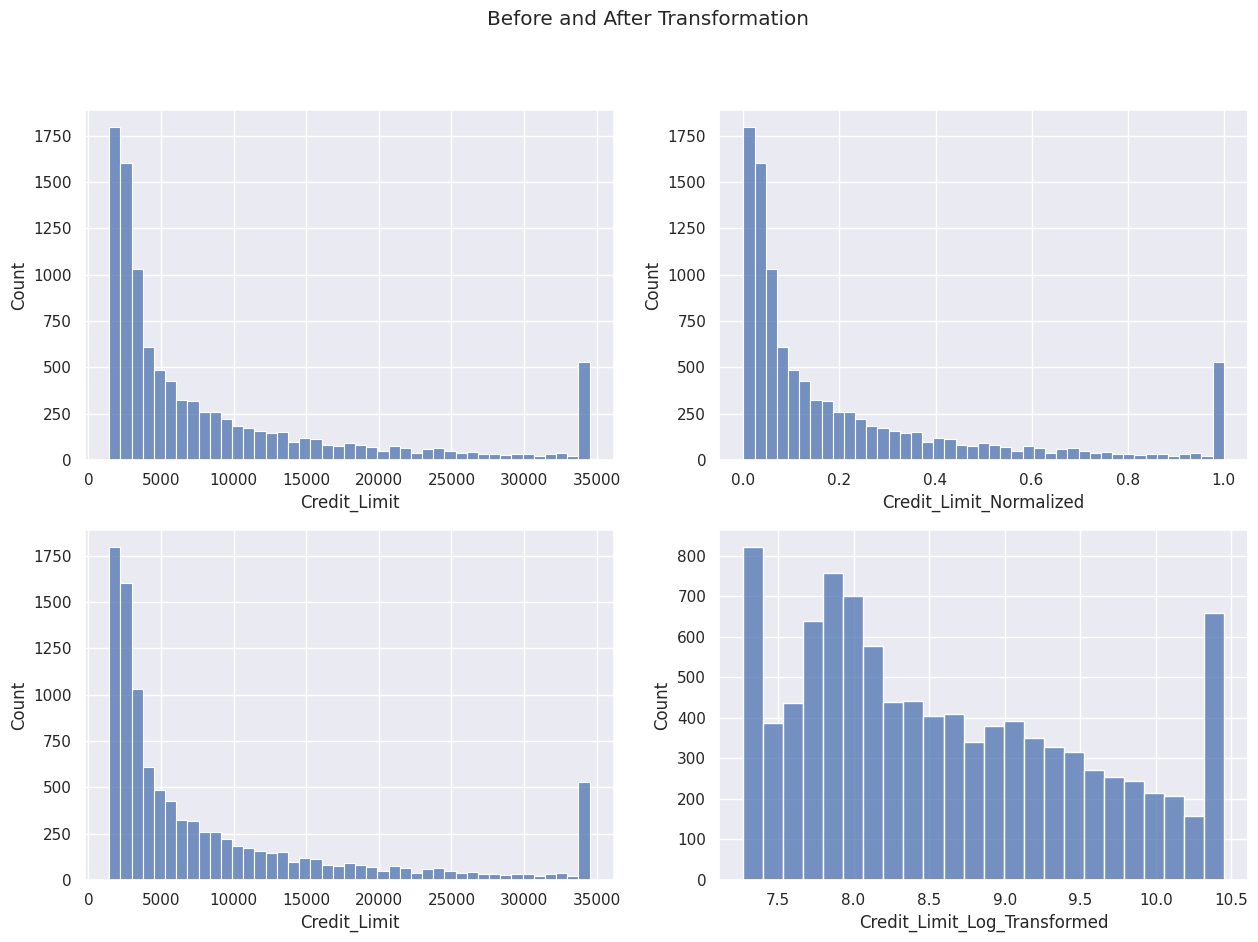

In [39]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Before and After Transformation')
# Create boxplot in each subplot
sns.histplot(data,x="Credit_Limit",ax=axes[0,0])
sns.histplot(data,x="Credit_Limit_Normalized",ax=axes[0,1])
sns.histplot(data,x="Credit_Limit",ax=axes[1,0])
sns.histplot(data,x="Credit_Limit_Log_Transformed",ax=axes[1,1])


BOX & WISKER PLOTS :

The box and wisker plot allows the analyst to quickly find and identify the median, quartiles and any outliers.

<Axes: xlabel='Gender', ylabel='Total_Trans_Ct'>

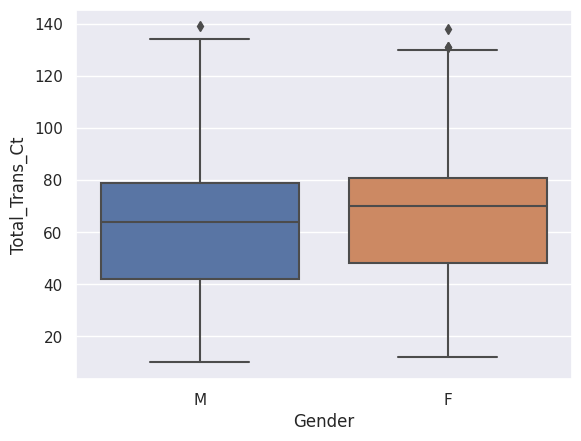

In [40]:
sns.boxplot(x=data['Gender'], y=data['Total_Trans_Ct'])

PYRAMID CHART :

DATA VISUALIZATION : COMPARING CATEGORIES

In [41]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_bins,Credit_Limit_Normalized,Credit_Limit_Log_Transformed
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40s,0.340190,9.448648
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40s,0.206112,9.018695
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50s,0.059850,8.136811
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40s,0.056676,8.105609
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40s,0.099091,8.458716


<Axes: xlabel='Customer_Age_bins', ylabel='Credit_Limit'>

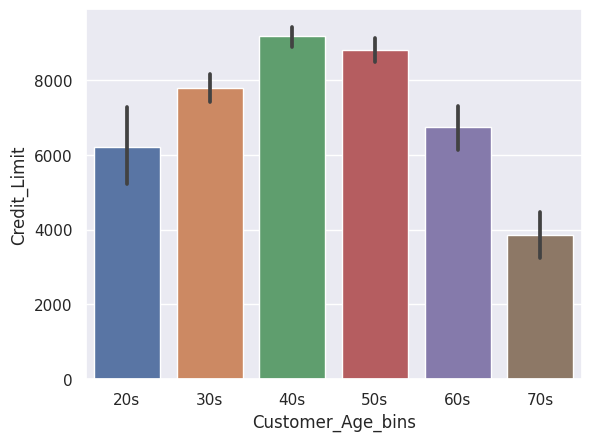

In [42]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data = data, estimator=np.mean)

Lets see what happens when we add in Gender, which we can do by specifying the Hue

<Axes: xlabel='Customer_Age_bins', ylabel='Credit_Limit'>

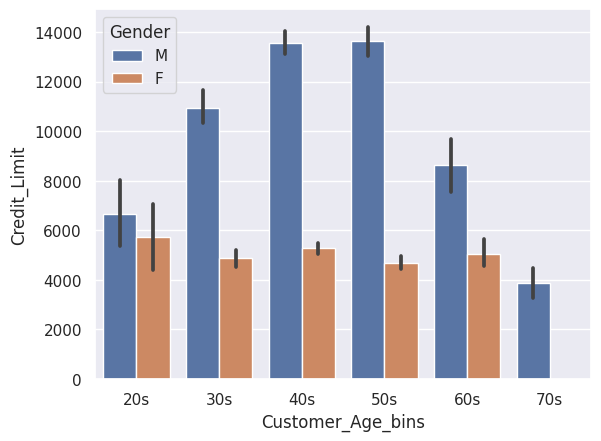

In [43]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit',hue='Gender', data = data, estimator=np.mean)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars



<Axes: xlabel='Customer_Age_bins', ylabel='Credit_Limit'>

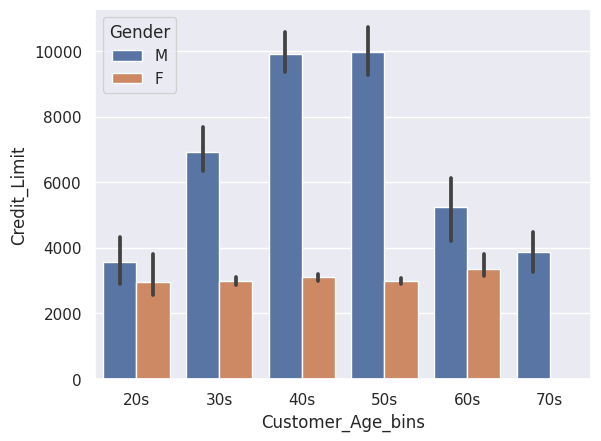

In [44]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit',hue='Gender', data = data, estimator=np.median)

In [45]:
barplot=data.groupby(['Customer_Age_bins','Gender'])['Credit_Limit'
].mean().reset_index()
print(barplot)

   Customer_Age_bins Gender  Credit_Limit
0                20s      F   5731.101075
1                20s      M   6649.367647
2                30s      F   4867.775314
3                30s      M  10948.605311
4                40s      F   5270.821784
5                40s      M  13557.484844
6                50s      F   4702.649475
7                50s      M  13635.717041
8                60s      F   5053.412857
9                60s      M   8626.832000
10               70s      F           NaN
11               70s      M   3860.500000


<Axes: xlabel='Customer_Age_bins', ylabel='Credit_Limit'>

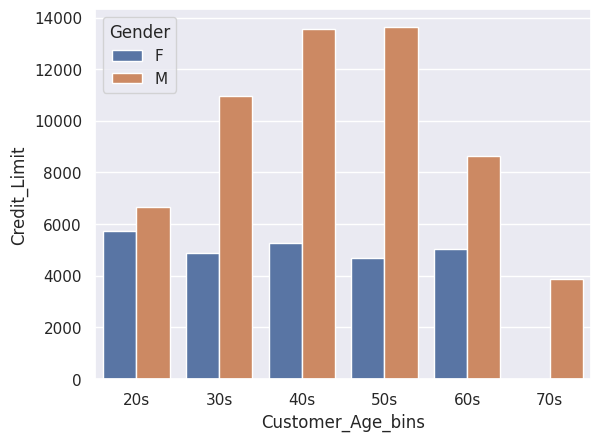

In [46]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit',hue='Gender', data = barplot, estimator=np.median)

<Axes: xlabel='Credit_Limit', ylabel='Customer_Age_bins'>

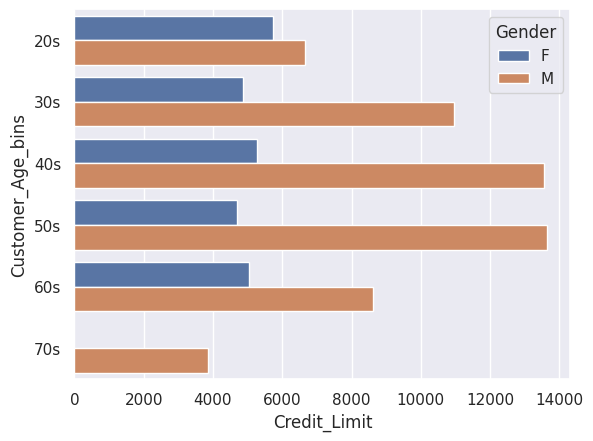

In [47]:
sns.barplot(x='Credit_Limit', y='Customer_Age_bins',hue='Gender', data = barplot, estimator=np.median, orient='h')

In [48]:
lollipop=data.groupby(['Customer_Age_bins'])['Credit_Limit'].mean().reset_index().sort_values('Credit_Limit')
print(lollipop)


  Customer_Age_bins  Credit_Limit
5               70s   3860.500000
0               20s   6211.425128
4               60s   6738.987925
1               30s   7790.933677
3               50s   8811.622181
2               40s   9178.870949


DATA VISULUALIZATION : DATA TABLES

In [49]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Customer_Age_bins', 'Credit_Limit_Normalized',
       'Credit_Limit_Log_Transformed'],
      dtype='object')

In [50]:
data.groupby(['Attrition_Flag']).agg({'CLIENTNUM':'nunique',
                                      'Customer_Age':'mean',
                                      'Dependent_count':'mean',
                                      'Months_on_book':'mean',
                                      'Total_Relationship_Count':'mean',
                                      'Months_Inactive_12_mon':'mean',
                                      'Contacts_Count_12_mon':'mean',
                                      'Credit_Limit':'mean',
                                      'Total_Revolving_Bal':'mean',
                                      'Avg_Open_To_Buy':'mean',
                                      'Total_Amt_Chng_Q4_Q1':'mean',
                                      'Total_Trans_Amt':'mean',
                                      'Total_Trans_Ct':'mean',
                                      'Total_Ct_Chng_Q4_Q1':'mean',
                                      'Avg_Utilization_Ratio':'mean'})

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,
Attrited Customer,1627,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,8500,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


In [51]:
data_pivot=data.groupby(['Attrition_Flag']).agg({'CLIENTNUM':'nunique',
                                      'Customer_Age':'mean',
                                      'Dependent_count':'mean',
                                      'Months_on_book':'mean',
                                      'Total_Relationship_Count':'mean',
                                      'Months_Inactive_12_mon':'mean',
                                      'Contacts_Count_12_mon':'mean',
                                      'Credit_Limit':'mean',
                                      'Total_Revolving_Bal':'mean',
                                      'Avg_Open_To_Buy':'mean',
                                      'Total_Amt_Chng_Q4_Q1':'mean',
                                      'Total_Trans_Amt':'mean',
                                      'Total_Trans_Ct':'mean',
                                      'Total_Ct_Chng_Q4_Q1':'mean',
                                      'Avg_Utilization_Ratio':'mean'}).T

In [52]:
data_pivot

Attrition_Flag,Attrited Customer,Existing Customer
CLIENTNUM,1627.000000,8500.000000
Customer_Age,46.659496,46.262118
Dependent_count,2.402581,2.335412
Months_on_book,36.178242,35.880588
Total_Relationship_Count,3.279656,3.914588
Months_Inactive_12_mon,2.693301,2.273765
Contacts_Count_12_mon,2.972342,2.356353
Credit_Limit,8136.039459,8726.877518
Total_Revolving_Bal,672.822987,1256.604118
Avg_Open_To_Buy,7463.216472,7470.273400


In [53]:
data_pivot['diff'] = data_pivot['Attrited Customer']/data_pivot['Existing Customer'] - 1
data_pivot.sort_values("diff")

Attrition_Flag,Attrited Customer,Existing Customer,diff
CLIENTNUM,1627.000000,8500.000000,-0.808588
Total_Revolving_Bal,672.822987,1256.604118,-0.464570
Avg_Utilization_Ratio,0.162475,0.296412,-0.451860
Total_Trans_Ct,44.933620,68.672588,-0.345683
Total_Trans_Amt,3095.025814,4654.655882,-0.335069
Total_Ct_Chng_Q4_Q1,0.554386,0.742434,-0.253286
Total_Relationship_Count,3.279656,3.914588,-0.162196
Total_Amt_Chng_Q4_Q1,0.694277,0.772510,-0.101271
Credit_Limit,8136.039459,8726.877518,-0.067703
Avg_Open_To_Buy,7463.216472,7470.273400,-0.000945


DATA VISUALIZATIONS : RELATIONSHIPS

In [54]:
numeric_data = data._get_numeric_data()

In [55]:
numeric_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Credit_Limit_Normalized', 'Credit_Limit_Log_Transformed'],
      dtype='object')

In [56]:
#g=sns.PairGrid(numeric_data, diag_sharey=False, corner=True)
#g.map_lower(sns.scatterplot)
#g.map_diag(sns.histplot)

<Axes: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

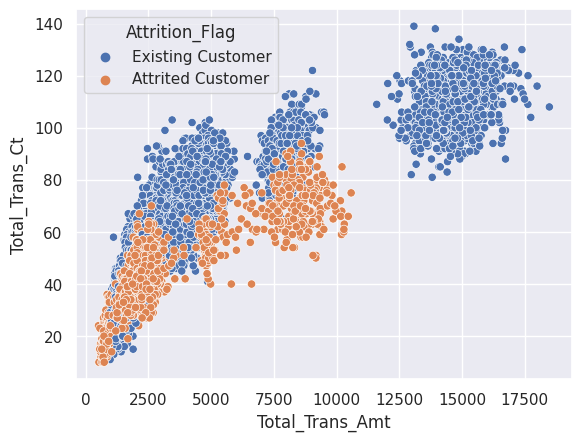

In [57]:
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

No attrited customers who have spent above $11k

RIDGE PLOT :

In [58]:
bins = [0,11000,900000]
labels = ["Group1","Group2"]
data['Total_Trans_Amt_bin'] = pd.cut(data['Total_Trans_Amt'],bins=bins,labels=labels, include_lowest=True, right=False)

In [59]:
data.groupby(['Total_Trans_Amt_bin','Attrition_Flag']).agg({'CLIENTNUM':'nunique',
                                      'Customer_Age':'mean',
                                      'Dependent_count':'mean',
                                      'Months_on_book':'mean',
                                      'Total_Relationship_Count':'mean',
                                      'Months_Inactive_12_mon':'mean',
                                      'Contacts_Count_12_mon':'mean',
                                      'Credit_Limit':'mean',
                                      'Total_Revolving_Bal':'mean',
                                      'Avg_Open_To_Buy':'mean',
                                      'Total_Amt_Chng_Q4_Q1':'mean',
                                      'Total_Trans_Amt':'mean',
                                      'Total_Trans_Ct':'mean',
                                      'Total_Ct_Chng_Q4_Q1':'mean',
                                      'Avg_Utilization_Ratio':'mean'
                                      }).T

Total_Trans_Amt_bin                 Group1                    \
Attrition_Flag           Attrited Customer Existing Customer   
CLIENTNUM                      1627.000000       7753.000000   
Customer_Age                     46.659496         46.373920   
Dependent_count                   2.402581          2.341545   
Months_on_book                   36.178242         35.964272   
Total_Relationship_Count          3.279656          4.064620   
Months_Inactive_12_mon            2.693301          2.279376   
Contacts_Count_12_mon             2.972342          2.369018   
Credit_Limit                   8136.039459       8213.629808   
Total_Revolving_Bal             672.822987       1245.908165   
Avg_Open_To_Buy                7463.216472       6967.721643   
Total_Amt_Chng_Q4_Q1              0.694277          0.772248   
Total_Trans_Amt                3095.025814       3686.943506   
Total_Trans_Ct                   44.933620         64.658326   
Total_Ct_Chng_Q4_Q1               0.554386          0.741687   
Avg_Utilization_Ratio             0.162475          0.307600   

Total_Trans_Amt_bin                 Group2                    
Attrition_Flag           Attrited Customer Existing Customer  
CLIENTNUM                              0.0        747.000000  
Customer_Age                           NaN         45.101740  
Dependent_count                        NaN          2.271754  
Months_on_book                         NaN         35.012048  
Total_Relationship_Count               NaN          2.357430  
Months_Inactive_12_mon                 NaN          2.215529  
Contacts_Count_12_mon                  NaN          2.224900  
Credit_Limit                           NaN      14053.797858  
Total_Revolving_Bal                    NaN       1367.615797  
Avg_Open_To_Buy                        NaN      12686.182062  
Total_Amt_Chng_Q4_Q1                   NaN          0.775229  
Total_Trans_Amt                        NaN      14698.396252  
Total_Trans_Ct                         NaN        110.336011  
Total_Ct_Chng_Q4_Q1                    NaN          0.750190  
Avg_Utilization_Ratio                  NaN          0.180288

(0.0, 2.0)

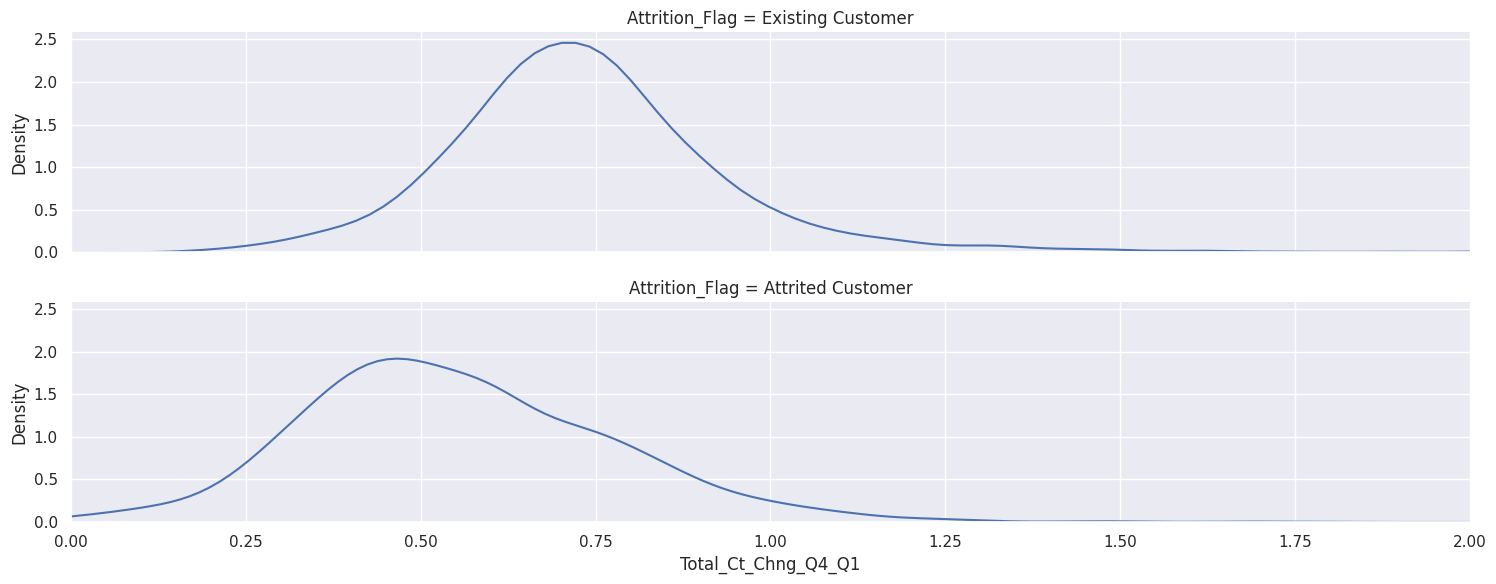

In [60]:
g=sns.FacetGrid(data, row='Attrition_Flag', aspect=5,height=3)
g.map_dataframe(sns.kdeplot,x='Total_Ct_Chng_Q4_Q1')
plt.xlim(0,2)

In [61]:
sns.set_theme(style="white")
palette = sns.color_palette("Set2",12)

Text(12500, 40, 'No churned customers \nabove $11k of spend')

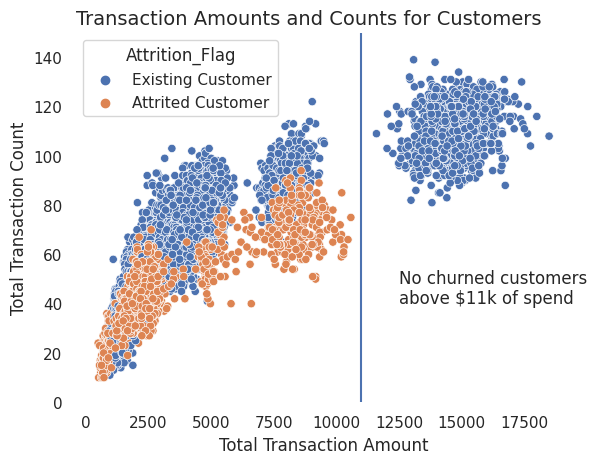

In [62]:
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')
sns.despine(bottom=True,left=True) #removes the border
plt.ylim(0,150)
plt.xlabel("Total Transaction Amount")
plt.ylabel("Total Transaction Count")
plt.title("Transaction Amounts and Counts for Customers",loc='left', size=14)
plt.vlines(11000,0,150) #adds in vertical line at the $11k mark
plt.text(12500,40,"No churned customers \nabove $11k of spend") #annotation

(0.0, 2.0)

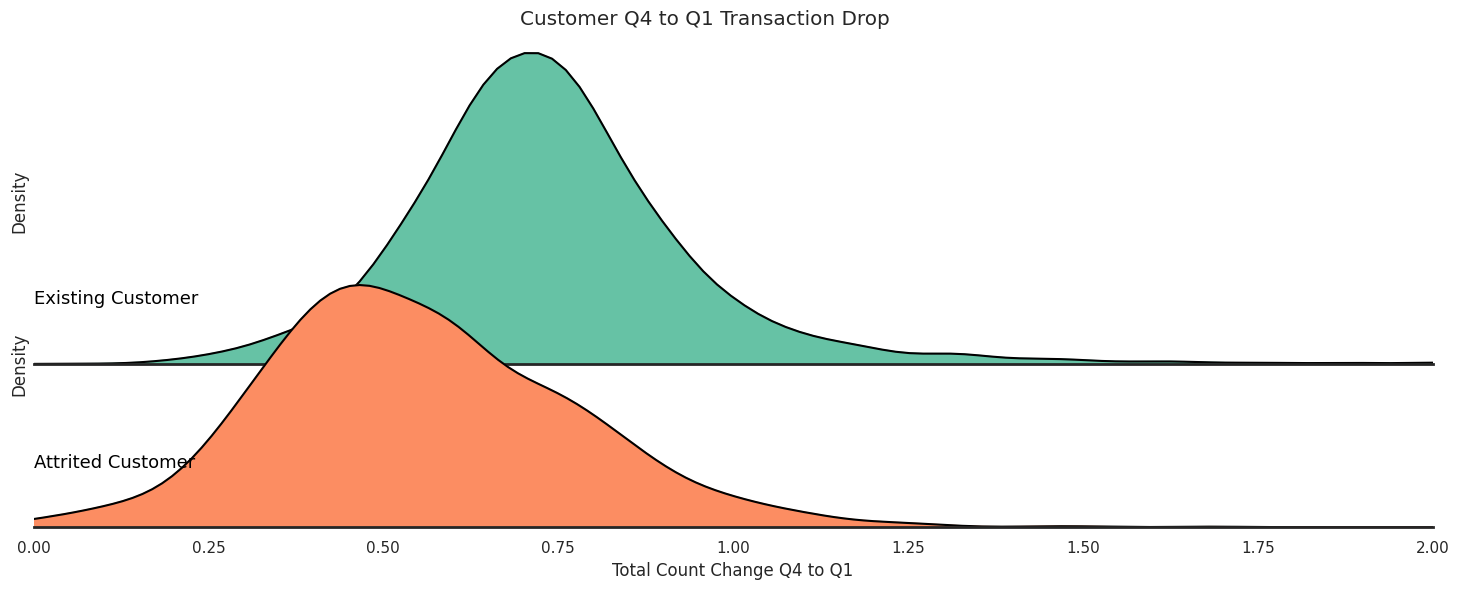

In [73]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns. FacetGrid(data, palette=palette, row="Attrition_Flag", hue="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
    ha="left", va="center", transform=ax.transAxes)
g.map(label, "Attrition_Flag")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Total Count Change Q4 to Q1")
g.despine(left=True)
plt.suptitle('Customer Q4 to Q1 Transaction Drop', y=0.98)
plt.xlim(0,2)


KEY FINDININGS :
1. This Credit card company on average has 10,000 customers.

2. As the transaction amout reaches to 4000, 16 % of customers stop using the credit card.

3. The average lifetime for our customers is 36 months

4. There are no churn customers in the group who have spent more than $11,000 with the credit card.

RECOMMENDATIONS :
'How can we get more customers above that 11,000 mark?'

1. Churn customers tend to drop off heavily after the New Year, showing a 55% drop in Q4 to Q1 transactions, which is 25% below non-attrited customers. This looks like a great opportunity to find and target customers who have seen or that we believe will show a large drop off around the New Year, and target them with special offers, discounts, cash back, or loyalty points.

2. Need to take user surveys for those who are spending above 11,000, and understand why they love the credit card and what keeps them around.